# Overview

The mobile games industry is worth billions of dollars, with companies spending vast amounts of money on the development and marketing of these games to an equally large market. Using this data set, insights can be gained into a sub-market of this market, strategy games. This sub-market includes titles such as Clash of Clans, Plants vs Zombies and Pokemon GO.


# Background

This is the data of 17007 strategy games on the Apple App Store. It was collected on the 3rd of August 2019, using the iTunes API and the App Store sitemap.

# Some ideas

You could use the number of ratings as a proxy indicator for the overall success of a game, and then work out what factors make a successful game. Or you could measure the state of the market over time and try predict where it is headed. And I think an analysis of the icons of the apps would be pretty cool.
Edit

If you want download all of the icons for these apps (as 512 x 512 jpegs), I have uploaded them here https://mega.nz/#!pQNX1a7Q!DjG5wTXJ0EKp31n2wxwYuJ_WRJ5cXHChEcKLAfzUYTM

In [1]:
from main import main

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/krisanaya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Process the data for inspection
data, df_mean, df_games, df = main()

In [3]:
# the game dataset
df_games.head(5)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,...,AppType,SubGenre_0,SubGenre_1,SubGenre_2,SubGenre_3,SubGenre_4,GenresSplit,stopWordsRemoved,categories,categoryCount
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,0,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,0.0,"(join over 21,000,000 of our fans and download...",...,games,puzzle,strategy,nosubgenre,nosubgenre,nosubgenre,"puzzle,strategy,nosubgenre,nosubgenre,nosubgen...","[(11, sudoku), (6, notes), (5, solving), (5, p...","[sudoku, notes, solving, puzzles]","[11, 6, 5, 5]"
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,0,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,0.0,"(the classic game of reversi, also known as ot...",...,games,board,strategy,nosubgenre,nosubgenre,nosubgenre,"board,strategy,nosubgenre,nosubgenre,nosubgenr...","[(6, game), (3, reversi), (3, play), (3, one)]","[game, reversi, play, one]","[6, 3, 3, 3]"
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,0,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,0.0,(play the classic strategy game othello (also ...,...,games,board,strategy,nosubgenre,nosubgenre,nosubgenre,"board,strategy,nosubgenre,nosubgenre,nosubgenr...","[(4, play), (3, game), (2, option), (2, iphone)]","[play, game, option, iphone]","[4, 3, 2, 2]"
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),0,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,0.0,"(top 100 free app for over a year.rated ""best ...",...,games,puzzle,strategy,nosubgenre,nosubgenre,nosubgenre,"puzzle,strategy,nosubgenre,nosubgenre,nosubgen...","[(8, sudoku), (6, notes), (5, puzzles), (4, so...","[sudoku, notes, puzzles, solving]","[8, 6, 5, 4]"
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,0,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,0.0,"(""senet deluxe - the ancient game of life and ...",...,games,board,education,strategy,nosubgenre,nosubgenre,"board,education,strategy,nosubgenre,nosubgenre...","[(9, game), (4, senet), (3, side), (3, player)]","[game, senet, side, player]","[9, 4, 3, 3]"


In [4]:
# the mean game dataset groupby
df_mean.head(5)

,SubGenre_0,Name,categories,Average User Rating,User Rating Count,Price,In-app Purchases,categoryCount,ratio_name_assn,ration_name_recv,ratio_sub_assn,ration_sub_recv,ratio_categories_assn,ration_categories_recv
0,action,!Ball Shots - Premium,balls,0.0,0.0,1.99,0.00,10,0.000323,1.409831e-09,0.000092,4.028089e-10,0.000077,3.356741e-10
1,action,!Ball Shots - Premium,game,0.0,0.0,1.99,0.00,4,0.000323,1.409831e-09,0.000092,4.028089e-10,0.000062,2.685393e-10
2,action,!Ball Shots - Premium,type,0.0,0.0,1.99,0.00,3,0.000323,1.409831e-09,0.000092,4.028089e-10,0.000062,2.685393e-10
3,action,!Ball Shots - Premium,worms,0.0,0.0,1.99,0.00,2,0.000323,1.409831e-09,0.000092,4.028089e-10,0.000077,3.356741e-10
4,action,"""Alice's Teacup Madness""",keep,4.5,1081.0,0.00,5.98,2,0.000370,1.611236e-09,0.000092,4.028089e-10,0.000062,2.685393e-10


# Specify maximum radius for Rips filtration¶

We can restrict the maximum radius of the VR complex by supplying the argument thresh=r. Certain classes will not be born if their birth time is under the threshold, and other classes will have infinite death times if their ordinary death time is above the threshold. The data is tested on 2000 data points. We can add more data points if necessary.

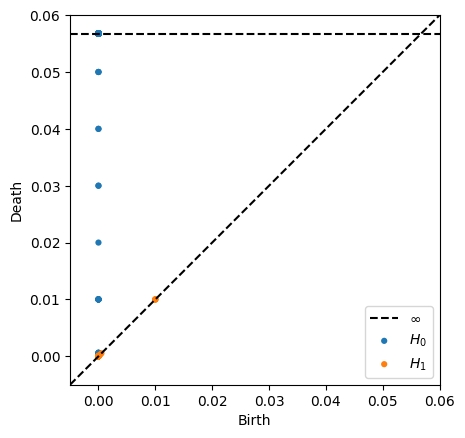

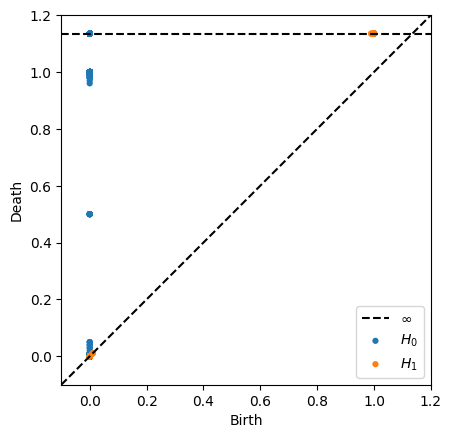

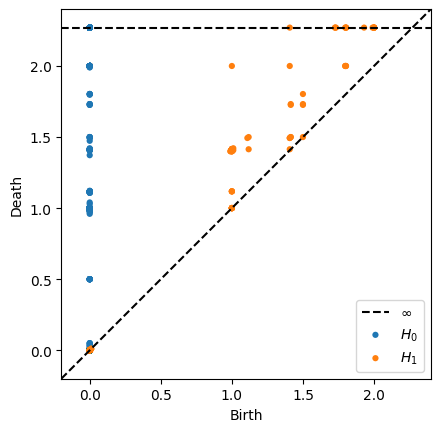

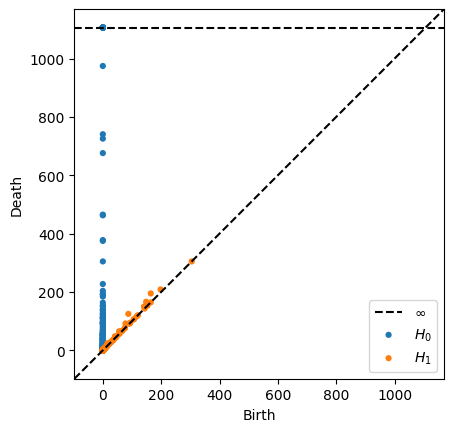

In [8]:
from ripser import ripser
from persim import plot_diagrams 

## change thresh hold
dgms = ripser(data, thresh=0.2)['dgms']
plot_diagrams(dgms, show=True)


dgms = ripser(data, thresh=1)['dgms']
plot_diagrams(dgms, show=True)


dgms = ripser(data, thresh=2)['dgms']
plot_diagrams(dgms, show=True)


dgms = ripser(data, thresh=999)['dgms']
plot_diagrams(dgms, show=True)

In [ ]:
plot_diagrams(diagrams['dgms'][1]) # Just degree-0